In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import jsonlines
from w3lib.html import remove_tags
import pickle

## 1. Loading News Dataset

In [4]:
%time
nowLen = 100
base_path = '/Github/Machine-Learning-in-Action/examples/news_data_generator/news_data_generator/spiders/'
file_name = 'timesall.jl'
data_path = base_path + file_name

train_set = {}
train_set['data'] = []
train_set['target'] = []
raw_counts = 0  # 统计原始数据数量
with open(data_path, "r+", encoding="utf8") as f:
    for i in jsonlines.Reader(f):
        # item: dict 表示一条原始数据
        """组装数据集"""
        title = ''.join(i['title']).lower()  # from list to lower str
        url = ''.join(i['url']).lower()
        if i['type'] != []:
            if i['content'] != []:
                train_set['target'].append(i['type'][0])
                train_set['data'].append(i['content'])
        elif i['module'] != []:
            if i['content'] != []:
                train_set['target'].append(i['module'][0])
                train_set['data'].append(i['content'])
        raw_counts += 1

data_len = len(train_set['data'])
target_len = len(train_set['target'])
print('原始数据集数量: {}'.format(raw_counts))
print('无类别文章个数: {}'.format(raw_counts - data_len))
print('可用数据集数据: {} - {}'.format(data_len, target_len))

CPU times: user 4 µs, sys: 4 µs, total: 8 µs
Wall time: 16 µs
原始数据集数量: 1721092
无类别文章个数: 49418
可用数据集数据: 1671674 - 1671674


In [5]:
target = train_set['target']
data = train_set['data']

c_max = 0
record_n = []
record_t = []
for i in set(target): # 统计分类下文章个数
    if target.count(i) > c_max:
        c_max = target.count(i)
        record_n.append(str(i))
        record_t.append(i)
    print('{}的个数: {}'.format(i, target.count(i)))

China-ASEAN的个数: 1
WWII parade的个数: 3
chuck@evercohol.com的个数: 21
Lantern Festival的个数: 13
Society的个数: 141132
Brexit的个数: 529
MARKETS的个数: 8758
Zhang Chunxian的个数: 6
Vaccine scandal的个数: 3
Smog的个数: 4
METRO BEIJING的个数: 7746
Asian Review的个数: 345
Bo Xilai的个数: 15
Olympics的个数: 8217
SCO meet的个数: 4
Diplomatic Channel的个数: 3033
Euro 2016的个数: 236
MASTERING CHINA的个数: 154
MOTORSPORT的个数: 118
Hockey的个数: 90
Edward Snowden的个数: 50
FILM的个数: 3599
13th Five-Year Plan的个数: 70
ECONOMY的个数: 18230
TOUCH OF WARMTH的个数: 5
http://www.mercedes-benzarena.com/的个数: 27
Lee Kuan Yew的个数: 15
Backgrounder: The company with explosive warehouses in Tianjin的个数: 3
Yang Jiechi的个数: 9
FEATURE的个数: 33
www.chelseafc.com的个数: 3
EYE ON THE BALL的个数: 87
POLITICS的个数: 8004
MEDICINE的个数: 425
Hurricane Matthew的个数: 6
Federal Reserve的个数: 9
Ministry of National Defense的个数: 51
Anti-Terrorism Law的个数: 8
Relationships的个数: 39
Fan Changlong的个数: 3
Boxing的个数: 180
Energy的个数: 948
National Development and Reform Commission的个数: 450
China-EU relations的个数: 9
Rugby的个数:

In [6]:
%time
"""合并小分类 -> 大分类"""
Sport = [
    'Soccer', 'Basketball', 'Baseball', 'Rugby', 'Hockey', 'Tennis', 'Golf',
    'Winter Sport', 'Olympics', 'Motorsport', 'Boxing', 'Eye on the Ball',
    'Track and Field', 'Water Sport', 'Miscellany', 'SPORT', 'SPORTS'
]
Americas = ['Americas', 'AMERICAS']
Europe = ['Europe', 'EUROPE']
Mid_East = ['Mid-East', 'MID_EAST','MID_east']
Economy = ['Eye on The Economy', 'Economy']
Politics = ['Politics', 'POLITICS', 'Politics']
Military = ['Military', 'Diplomacy', 'MILITARY']
Life = ['LIFE', 'PHOTOS', 'life']
Companies = ['COMPANIES', 'Companies']
SouthAsia = ['Central & South Asia', 'CENTRAL & SOUTH ASIA', 'Miscellany']

categorys = [
    Sport, Americas, Europe, Mid_East, Economy, Politics, Military, Life,
    Companies, SouthAsia
]  # 十个类别

print('初始数据集大小: {} - {}'.format(len(train_set['data']),
                                len(train_set['target'])))
SPORT, AMERICAS, EUROPE, MID_EAST, ECONOMY, POLITICS, MILITARY, LIFE, \
    COMPANY, SOUTHASIA = [],[],[],[],[],[],[],[],[],[]
stores = [
    SPORT, AMERICAS, EUROPE, MID_EAST, ECONOMY, POLITICS, MILITARY, LIFE,
    COMPANY, SOUTHASIA
]
# 分类

for category, store in zip(categorys, stores):
    for index, i in (enumerate(zip(train_set['data'], train_set['target']))):
        for item in category:
            if i[1].lower() in item.lower():
                # 填充分类数据
                store.append(i[0])
                if len(store) > 155000:
                    break;
                #数据集中删除数据
#                 del train_set['data'][index]
#                 del train_set['target'][index]
#     print('个数: {}'.format(len(store)))
#     print('数据集大小: {} - {}'.format(len(train_set['data']),
#                                   len(train_set['target'])))

# 分类持久化数据
category_name = [
    'Sport', 'Americas', 'Europe', 'Mid_East', 'Economy', 'Politics',
    'Military', 'Life', 'Companies', 'SouthAsia'
]
for file_name, file in zip(category_name, stores):
    f = open('{}.pkl'.format(file_name), 'wb')
    print('{}的数量: {}'.format(file_name, len(file)))
    pickle.dump(file, f)
    f.close()

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 14.8 µs
初始数据集大小: 1671674 - 1671674
Sport的数量: 160266
Americas的数量: 141462
Europe的数量: 164833
Mid_East的数量: 69737
Economy的数量: 174037
Politics的数量: 130161
Military的数量: 105995
Life的数量: 124238
Companies的数量: 115362
SouthAsia的数量: 131027


In [7]:
%time
# 制作数据集
X = []  # list[str]
y = []  # list[int] int: category_name中的下标
for index, fileName in enumerate(category_name):
    fr = open('{}.pkl'.format(fileName), 'rb')
    categoty_data = []
    categoty_data = pickle.load(fr)
    for data in categoty_data:
        X.append(data)
        y.append(index)
    fr.close()
    
f = open('X', 'wb')
pickle.dump(X, f)
f.close()

f = open('y', 'wb')
pickle.dump(y, f)
f.close()

for i in set(y): # 统计分类下文章个数
    print('%s的个数：%s' %(i,y.count(i)))

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.5 µs
0的个数：160266
1的个数：141462
2的个数：164833
3的个数：69737
4的个数：174037
5的个数：130161
6的个数：105995
7的个数：124238
8的个数：115362
9的个数：131027


## Train Test dataset split

In [8]:
from sklearn.model_selection import train_test_split

X = []
y = []
fr_X = open('X_now.pkl', 'rb')
X = pickle.load(fr_X)
fr_X.close()
fr_y = open('y_now.pkl', 'rb')
y = pickle.load(fr_y)
fr_y.close()

# X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print('训练集大小:{}'.format(len(X_train)))
print('测试集大小:{}'.format(len(X_test)))

训练集大小:583066
测试集大小:583067


## 2. Data preprocessing

### Data Cleaning:  regular expersion

In [9]:
%time
import re

r1 = "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+" "'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"
r2 = '[\001\002\003\004\005\006\007\x08\x09\x0a\x0b\x0c\x0d\x0e\x0f\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a]+'

"""
sentence = "hello! wo?rd!. \n\n\n\n      \n ,,,,,\t\t\t\t ////t/t/t/t /n/n//n"

cleanr = re.compile('<.*?>') # 匹配HTML标签规则
sentence = re.sub(cleanr, '', sentence)  # 去除HTML标签
sentence = re.sub(r1, '', sentence) 
sentence = re.sub(r2, '', sentence)
print(sentence)
"""
def find_unchinese(file):
    pattern = re.compile(r'[\u4e00-\u9fa5]')
    unchinese = re.sub(pattern,"",file)
    return unchinese

cleanr = re.compile('<.*?>') # 匹配HTML标签规则
for index, sentence in enumerate(X_train):
    sentence = ''.join(sentence) # list -> str
    sentence = re.sub(cleanr, '', sentence)  # 去除HTML标签
    sentence = re.sub(r1, '', sentence) 
    sentence = re.sub(r2, '', sentence)
    sentence = sentence.lower() # to lower case
    find_unchinese(sentence)
    X_train[index] = sentence
    
for index, sentence in enumerate(X_test):
    sentence = ''.join(sentence) # list -> str
    sentence = re.sub(cleanr, '', sentence)  # 去除HTML标签
    sentence = re.sub(r1, '', sentence) 
    sentence = re.sub(r2, '', sentence)
    sentence = sentence.lower()
    find_unchinese(sentence)
    X_test[index] = sentence

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 14.8 µs


In [10]:
print(X_train[211])
print(X_test[211])

                                head of atomic energy organization of iran ali-akbar salehi said that the islamic republic is ready to allay the wests concerns over its controversial nuclear program tehran times daily reported saturday"we acknowledge their concerns and are ready to ease them by international conventions" said salehi without specifying the issues that might be the source of controversyin past nuclear talks irans high-grade uranium enrichment activities and its refusal to give inspectors access to certain military sites suspected of nuclear experiments had been hampering progress in resolving its nuclear issueiran and the international atomic energy agency iaea last met in may and failed to achieve any breakthrough that would allow the un unclear watchdog to carry out further investigations into tehrans nuclear activitiesthe two sides are scheduled to hold their next round of talks in vienna on sept 27 while salehi stressed "our principles have not changed and we have al

### Data Cleaning: stop words

In [11]:
import nltk
from nltk.tokenize import word_tokenize
# nltk.download()
# nltk.download('stopwords')
"""引入停用词表"""
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
print('English Stop Words List：\n', stop)

# sentence = "this is a apple"
# filter_sentence = [
#     w for w in sentence.split(' ') if w not in stopwords.words('english')
# ]
# print(filter_sentence)

X_train_sw = X_train[:200]
"""匹配停用词"""
for index, item in tqdm(enumerate(X_train_sw)):
    X_train[index] = " ".join([
        w for w in X_train[index].split(' ')
        if w not in stopwords.words('english')
    ])
print(X_train[20])

# for index, item in tqdm(enumerate(X_test)):
#     X_test[index] = " ".join([
#         w for w in X_test[index].split(' ')
#         if w not in stopwords.words('english')
#     ])
# print(X_test[90001])

3it [00:00, 27.52it/s]

English Stop Words List：
 {'this', 'over', "weren't", 'were', 'nor', 'your', 'are', 'until', 'herself', 'both', 'hasn', 'our', 'too', 'about', 'how', 'my', "it's", 'if', 'ourselves', 'hers', 'have', 'here', 'once', 'll', 'who', 'i', 're', 'above', 'off', 'me', 'his', 'their', 'did', 'these', 'having', 'by', "she's", 'we', 'more', 'wouldn', "you'd", 'am', 'ours', 'out', 'myself', 'but', 'can', 'won', 'any', 'ma', 'now', 'than', "wouldn't", 'from', 'they', 'for', 'yours', 'a', 'under', "hasn't", 'isn', 'aren', "mustn't", "didn't", 'them', 'you', 'just', 'y', 'with', 'there', 't', 'as', "mightn't", 'same', 'hadn', 'being', 'again', 'the', 'him', 'whom', 'in', 'haven', 'between', 'on', 'such', 'didn', 'other', 'when', 's', 'd', 'only', 'to', 'each', 'into', 'where', 'what', 'before', 'should', 'o', 'an', 'himself', "you've", 'will', 'those', 'yourselves', 'after', 'all', 'is', "won't", 'doing', 'been', 'or', 've', 'mightn', 'down', 'through', "needn't", 'she', "don't", "hadn't", 'own', 'do

200it [00:10, 18.62it/s]

                                sebastian vettel poses laureus sportsman trophy kuala lumpur wednesday photo cfpmissy franklin poses laureus sportswoman trophy kuala lumpur wednesday photo cfpformula one world champion sebastian vettel swim star missy franklin named laureus sportsman woman year wednesday ceremony malaysia tinged tragedy mh370 plane ­disastergermanys treble-winners bayern munich beat rugbys blacks team 2013 rafael nadal comeback year glamorous awards show downtown kuala lumpurthe ceremony packed greats world sport preceded moments silence 239 ­people killed flight mh370 crashed indian ocean still unexplained circumstancesvettel f1s youngest four-time world champion kuala lumpur weeks malaysian grand prix sportsman 2013 ahead usain bolt lebron james nadal cristiano ronaldo mo farahfranklin 18 beat tennis great serena williams russian pole vault queen yelena isinbayeva among others womens award record six golds last years world championshipsspains nadal comeback year amaz

### Normalization: lemmatization

In [12]:
"""stemming -- 词干提取(no use)"""
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english") # 选择语言
# stemmer.stem("leaves") # 词干化单词
X_stem = X_train[:nowLen]
for index, item in tqdm(enumerate(X_stem)):
    X_stem[index] = stemmer.stem(item)

"""lemmatization -- 词型还原(use)"""
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
wnl = WordNetLemmatizer()
# print(wnl.lemmatize('leaves'))

# for i in tqdm(range(len(train_set.data))):
#     train_set[i] = wnl.lemmatize(train_set.data[i])    
# print(train_set.data[:1])

for index, item in tqdm(enumerate(X_train)):
    X_train[index] = wnl.lemmatize(item)
for index, item in tqdm(enumerate(X_test)):
    X_test[index] = wnl.lemmatize(item)

100it [00:00, 3744.15it/s]
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
583066it [00:09, 63529.36it/s]
583067it [00:04, 141456.82it/s]


In [13]:
print("词干提取:")
print(X_stem[nowLen -1])

print("词型还原:")
print("{}".format(X_train[211]))
print("{}".format(X_test[211]))

词干提取:
                                south korean shares rose wednesday upbeat economic data china eased market concerns caused scheduled congressional testimony federal reserve chairman ben bernankethe benchmark korea composite stock price index rose 2113 points 113 percent close 188749 trading volume stood 37845 million shares worth 397 trillion 354 billion us dollarschinas foreign direct investment surprisingly jumped 20 percent june year earlier figure eased worries chinas economic slowdownforeign investors maintained buying streak five straight sessions stock purchases worth 1195 billion institutional investors bought stocks worth 2399 billion turning net buyers five trading days retail investors sold shares worth 3528 billion bid lock profitsconcerns however remained early exit us quantitative easing ahead bernankes testimony us congress slated wednesday thursdaymarket bellwether samsung electronics gained 17 percent top automaker hyundai motor advanced 28 percent no2 carmaker k

### Extracting Features

In [14]:
%time
"""build data dict"""
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()  # 特征向量计数函数
X_train_counts = count_vect.fit_transform(X_train)  # 对文本进行特征向量处理
print(X_train_counts.shape)
print(X_train_counts[211])

"""TF-IDF: Term Frequency-Inverse Document Frequency"""
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

print('X_train_tfidf shape: {}'.format(X_train_tfidf.shape))
print(X_train_tfidf[211])

CPU times: user 14 µs, sys: 1e+03 ns, total: 15 µs
Wall time: 30 µs
(583066, 554883)
  (0, 489607)	1
  (0, 535670)	1
  (0, 534822)	1
  (0, 231986)	1
  (0, 247731)	7
  (0, 199258)	1
  (0, 282446)	2
  (0, 524331)	1
  (0, 404163)	1
  (0, 53789)	1
  (0, 506297)	1
  (0, 437772)	1
  (0, 492905)	1
  (0, 420693)	2
  (0, 218882)	1
  (0, 301086)	1
  (0, 533165)	3
  (0, 306073)	1
  (0, 359582)	1
  (0, 46980)	1
  (0, 486830)	21
  (0, 180250)	2
  (0, 494642)	10
  (0, 84257)	1
  (0, 430201)	1
  :	:
  (0, 181038)	1
  (0, 399776)	1
  (0, 252991)	1
  (0, 188569)	1
  (0, 227767)	1
  (0, 408291)	1
  (0, 259356)	1
  (0, 208605)	1
  (0, 47136)	1
  (0, 508470)	1
  (0, 384195)	1
  (0, 500299)	1
  (0, 465577)	1
  (0, 259400)	1
  (0, 229823)	1
  (0, 416386)	2
  (0, 371606)	1
  (0, 129682)	1
  (0, 481437)	1
  (0, 154825)	1
  (0, 229117)	1
  (0, 479771)	1
  (0, 409940)	1
  (0, 59660)	1
  (0, 377787)	1
X_train_tfidf shape: (583066, 554883)
  (0, 535670)	0.026630263579985207
  (0, 534822)	0.030736027537708467
  (0

## 3. Bayes Classifier

### 3.1 Train Bayes

In [15]:
%time
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

multinomialNB_pipeline = Pipeline([('Vectorizer',
                                    CountVectorizer(stop_words='english',
                                                    ngram_range=(1,1),
                                                    max_df=0.5)),
                                   ('TF_IDF', TfidfTransformer(use_idf=True)),
                                   ('MultinomialNB', MultinomialNB(alpha=1e-4))]) # 1e-5
multinomialNB_pipeline.fit(X_train, y_train)
print(" Show gaussianNB_pipeline:\n", multinomialNB_pipeline)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 14.3 µs
 Show gaussianNB_pipeline:
 Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('TF_IDF',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('MultinomialNB',
                 MultinomialNB(alpha=0.

### 3.2 Evaluation Bayes

In [16]:
%time
from sklearn.metrics import classification_report, confusion_matrix

# test_set = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
# docs_test = test_set.data
predicted = multinomialNB_pipeline.predict(X_test)

print(
    classification_report(y_test,
                          predicted,
                          digits=4,
                          target_names=category_name))

CPU times: user 0 ns, sys: 6 µs, total: 6 µs
Wall time: 14.3 µs
              precision    recall  f1-score   support

       Sport     0.9973    0.9888    0.9930     51933
    Americas     0.9925    0.9896    0.9911     52489
      Europe     0.9919    0.9910    0.9914     62053
    Mid_East     0.9891    0.9942    0.9917     55378
     Economy     0.9867    0.9849    0.9858     56795
    Politics     0.9857    0.9891    0.9874     55829
    Military     0.9950    0.9869    0.9910     55423
        Life     0.9917    0.9916    0.9917     55428
   Companies     0.9839    0.9940    0.9889     55755
   SouthAsia     0.9923    0.9942    0.9933     81984

    accuracy                         0.9906    583067
   macro avg     0.9906    0.9904    0.9905    583067
weighted avg     0.9906    0.9906    0.9906    583067



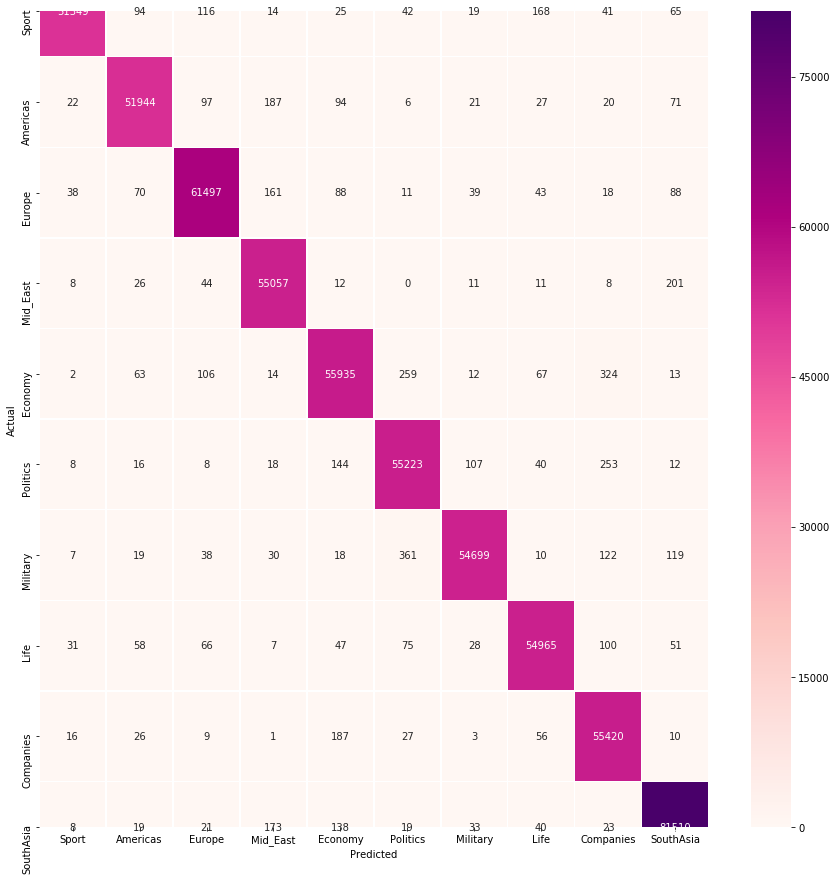

In [17]:
# calculate confusion_matrix and plot it
confusion_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_mat,
            annot=True,
            fmt='d',
            cmap="RdPu",
            linewidths=.3,
            xticklabels=category_name,
            yticklabels=category_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 4. SVM Classifier

### 4.1 Train svm

In [18]:
%time
from sklearn.linear_model import SGDClassifier

SGDClassifier_pipline = Pipeline([('Vectorizer',
                                   CountVectorizer(stop_words='english',
                                                   ngram_range=(1,3),
                                                   max_df=0.5)),
                                  ('TF_IDF', TfidfTransformer(use_idf=True)),
                                  ('SGDClassifier',
                                   SGDClassifier(loss='hinge', # linear SVM
                                                 penalty='l2', 
                                                 alpha=1e-6, # 1e-6
                                                 n_jobs = -1,
                                                 random_state=42))])
SGDClassifier_pipline.fit(X_train, y_train)
print(" Show SGDClassifier_pipline:\n", SGDClassifier_pipline)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 14.3 µs
 Show SGDClassifier_pipline:
 Pipeline(memory=None,
         steps=[('Vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...
                ('SGDClassifier',
                 SGDClassifier(alpha=1e-06, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_

### 4.2 Evaluation SVM

In [19]:
%time
predicted_2 = SGDClassifier_pipline.predict(X_test)
print(classification_report(y_test, predicted_2, digits=4, target_names=category_name))

CPU times: user 205 µs, sys: 13 µs, total: 218 µs
Wall time: 19.1 µs
              precision    recall  f1-score   support

       Sport     0.9981    0.9945    0.9963     51933
    Americas     0.9982    0.9971    0.9976     52489
      Europe     0.9968    0.9975    0.9972     62053
    Mid_East     0.9975    0.9972    0.9974     55378
     Economy     0.9982    0.9957    0.9970     56795
    Politics     0.9985    0.9994    0.9990     55829
    Military     0.9991    0.9984    0.9988     55423
        Life     0.9971    0.9982    0.9976     55428
   Companies     0.9964    0.9991    0.9978     55755
   SouthAsia     0.9976    0.9993    0.9984     81984

    accuracy                         0.9977    583067
   macro avg     0.9978    0.9976    0.9977    583067
weighted avg     0.9977    0.9977    0.9977    583067



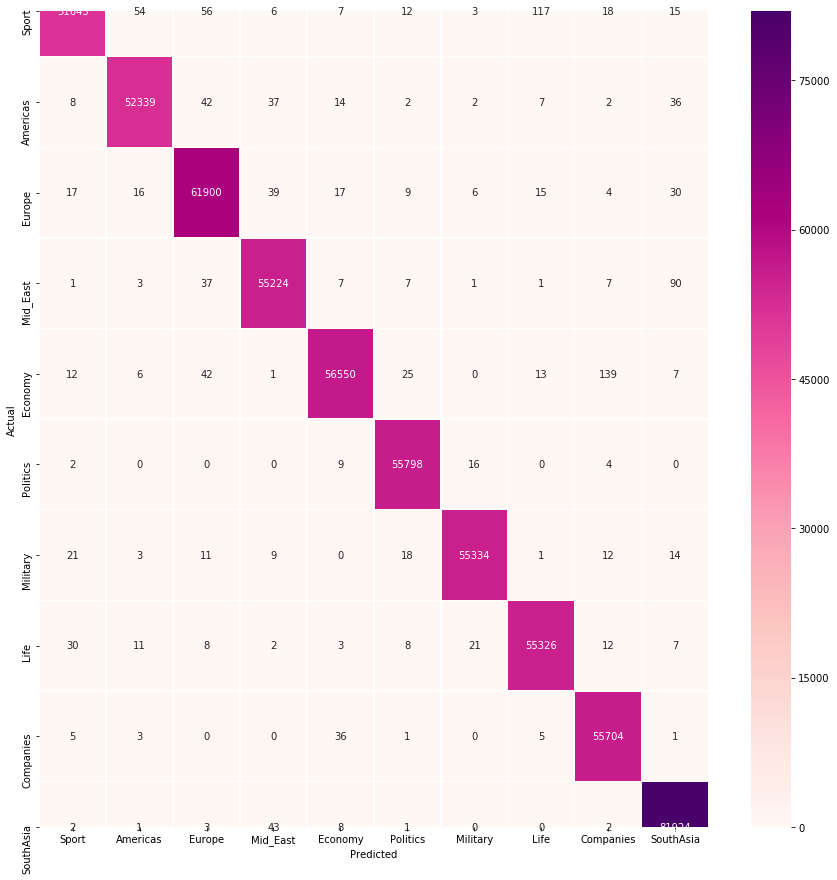

In [20]:
# calculate confusion_matrix and plot it
confusion_mat_2 = confusion_matrix(y_test, predicted_2)
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(confusion_mat_2,
            annot=True,
            fmt='d',
            cmap="RdPu",
            linewidths=.3,
            xticklabels=category_name,
            yticklabels=category_name)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Grid Search

In [1]:
%time
from sklearn.model_selection import GridSearchCV
from  sklearn.model_selection import RandomizedSearchCV

bayes_params = {
#     'Vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'TF_IDF__use_idf': (True, False),
    'MultinomialNB__alpha': (1e-3, 1e-4, 1e-5),
    'MultinomialNB__fit_prior' : (True, False),
}

grid = GridSearchCV(multinomialNB_pipeline, bayes_params, cv=5, iid=False, n_jobs=25)
# grid = RandomizedSearchCV(multinomialNB_pipeline, bayes_params, cv=5, iid=False, refit=True, n_jobs=25)
grid.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [2]:
%time
svm_params = {
#     'Vectorizer__ngram_range': [(1, 2), (1, 3), (1, 4)],
#     'TF_IDF__use_idf': (True, False),
#     'SGDClassifier__loss': ('hinge', 'squared_hinge'),
#     'SGDClassifier__penalty': ('l2', 'elasticnet'),
    'SGDClassifier__alpha': (1e-4, 1e-5, 1e-6, 1e-7),
#     'SGDClassifier__power_t': (0.4, 0.5, 0.6)
}

# grid = GridSearchCV(SGDClassifier_pipline, svm_params, cv=5, iid=False, refit=True ,n_jobs=25)
grid = RandomizedSearchCV(SGDClassifier_pipline, svm_params, cv=5, iid=False, refit=True, n_jobs=25)
grid.fit(X_train, y_train)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

## 模型持久化

In [27]:
from sklearn.externals import joblib

joblib.dump(multinomialNB_pipeline, 'multinomialNB_pipeline.pkl') 
multinomialNB_pipeline = joblib.load('multinomialNB_pipeline.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [28]:
from sklearn.externals import joblib

joblib.dump(SGDClassifier_pipline, 'SGDClassifier_pipline.pkl') 
SGDClassifier_pipline = joblib.load('SGDClassifier_pipline.pkl') 